In [3]:
from __future__ import absolute_import, division, print_function
from IPython.display import HTML, display

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline
import plotly.plotly as plotly
style.use('seaborn-colorblind')

from collections import Counter
import datetime as dt
import numpy as np
import pandas as pd
import os
import requests
import requests_cache

# Scikit-learn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import log_loss
from sklearn.model_selection import learning_curve

import multiprocessing

# Keras with Tensorflow GPU backend
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier
# When the model will be selected this wrapper class will be used to perform cross-validation
# or even cross-validation with automatic parameter tunning (grid search) using scikit-learn.
from keras.models import Model
from keras import layers
from keras.engine.topology import Layer
from keras.layers.merge import concatenate
from keras import initializers
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input, BatchNormalization, LSTM, Embedding, Reshape, Bidirectional, GlobalMaxPool1D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
Using TensorFlow backend.


In [4]:
df = pd.read_csv("sample_data_for_ml_testing.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
x = df[['last_registered_capacity', 'mood', 'hours_of_sleep', 'objectiveType', 'weight_kg']].as_matrix()
y = df[['session_type']].as_matrix()

In [5]:
df.head()

,index,last_registered_capacity,mood,hours_of_sleep,objectiveType,weight_kg,session_type
date,,,,,,,
2017-10-06,0,5464,200,5,0,66,2.0
2017-10-07,1,6041,100,8,0,66,2.0
2017-10-08,2,25,100,5,0,66,1.0
2017-10-09,3,5461,100,4,0,66,2.0
2017-10-10,4,6915,200,5,500,66,2.0


In [236]:
x = x_df.as_matrix()
y = session_type

In [237]:
# First Train/Test split to get the model.
# Stratified process will be performed anyway to ensure the correct sample's distribution.
for train_index, test_index in StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state = 0).split(x,y):
    Xtrain = x[train_index,:]
    Xtest = x[test_index,:]
    Ytrain = y[train_index]
    Ytest = y[test_index]

GradientBoost: 0.960317 (0.061168)
predicted class counts: Counter({1.0: 10, 2.0: 9, 3.0: 5})
Accuracy score in test: 0.875


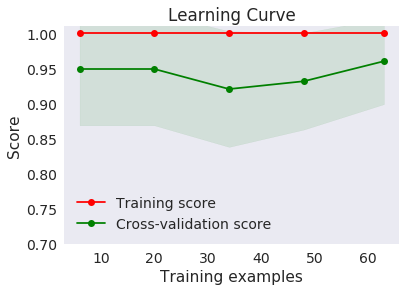

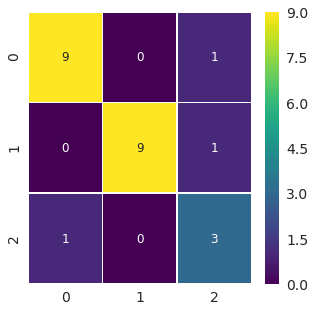

AdaBoost: 0.960317 (0.061168)
predicted class counts: Counter({1.0: 11, 2.0: 9, 3.0: 4})
Accuracy score in test: 0.916666666667


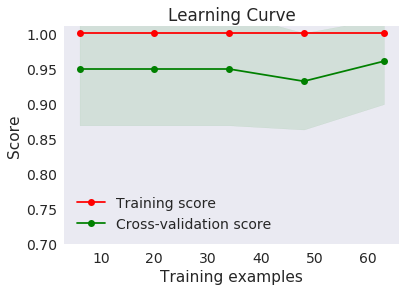

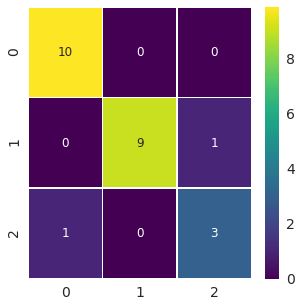

RF: 0.960317 (0.061168)
predicted class counts: Counter({1.0: 10, 2.0: 9, 3.0: 5})
Accuracy score in test: 0.958333333333


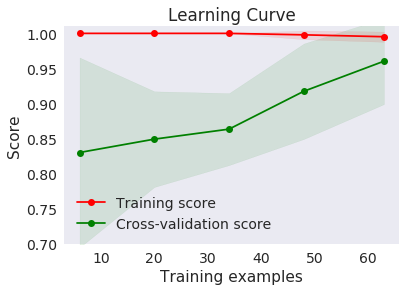

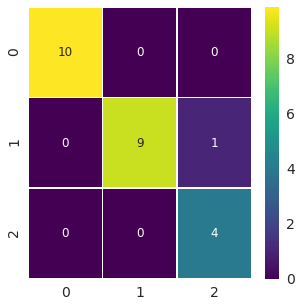

ExtraTrees: 0.934921 (0.082616)
predicted class counts: Counter({2.0: 9, 1.0: 8, 3.0: 7})
Accuracy score in test: 0.875


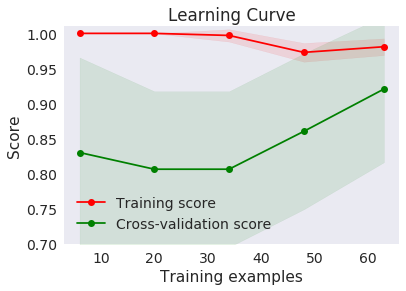

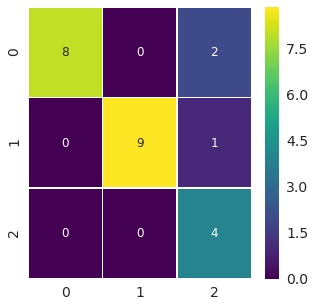

KNN: 0.971429 (0.057143)


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:547: UserWarning:

Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1



predicted class counts: Counter({1.0: 9, 2.0: 9, 3.0: 6})
Accuracy score in test: 0.916666666667


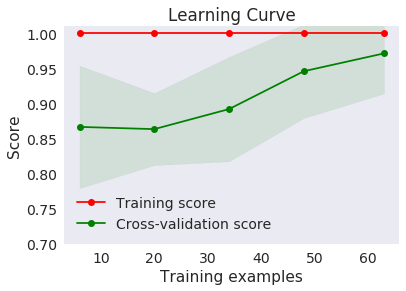

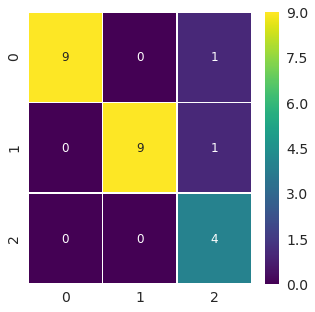

DT: 0.960317 (0.061168)
predicted class counts: Counter({1.0: 10, 2.0: 9, 3.0: 5})
Accuracy score in test: 0.875


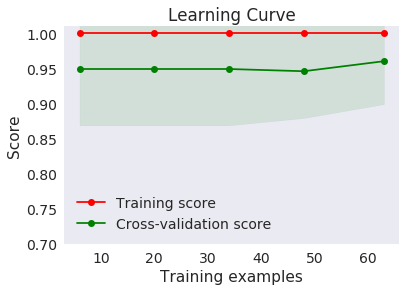

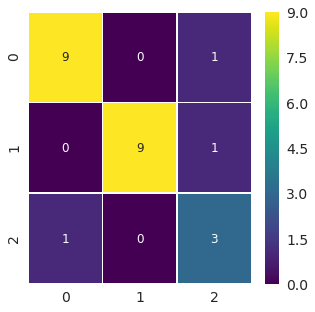

SVM: 0.430159 (0.004762)
predicted class counts: Counter({1.0: 24})
Accuracy score in test: 0.416666666667


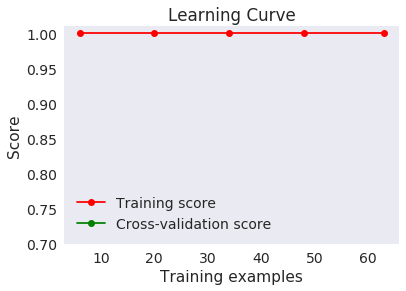

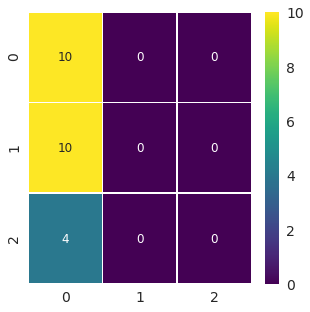

MLP: 0.147619 (0.098630)
predicted class counts: Counter({1.0: 15, 3.0: 8, 2.0: 1})
Accuracy score in test: 0.208333333333


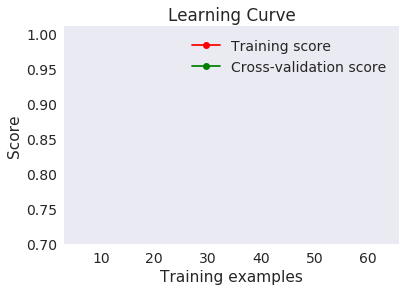

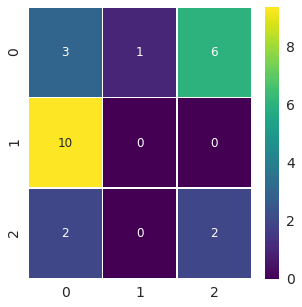

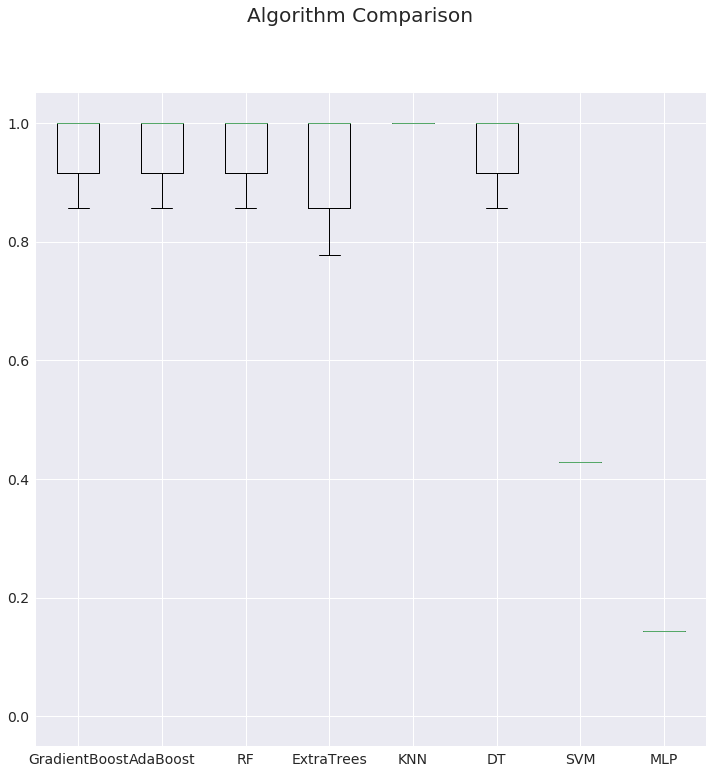

In [238]:
%matplotlib inline

def do_ml(x, y):
    
    # Get a representative subset of the data for testing and use the rest of the data for cross-validation and training.
    for crossvalid_index, test_index in StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state = 0).split(x,y):
        X_crossvalid = x[crossvalid_index,:]
        X_test = x[test_index,:]
        Y_crossvalid = y[crossvalid_index]
        Y_test = y[test_index]
    
    # Models to be evaluated and compared
    models = []
    models.append(('GradientBoost', GradientBoostingClassifier(n_estimators=100, random_state=0)))
    models.append(('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=0)))
    models.append(('RF', RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0, class_weight='balanced')))
    models.append(('ExtraTrees', ExtraTreesClassifier(n_estimators=200, max_depth=5, random_state=0, class_weight='balanced')))
    models.append(('KNN', KNeighborsClassifier(algorithm="auto", weights='distance', n_jobs=-1)))
    models.append(('DT', DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced')))
    models.append(('SVM', SVC(class_weight="balanced")))
    models.append(('MLP', MLPClassifier(alpha=1e-5, hidden_layer_sizes=(15,), activation='relu', random_state=0)))
    
    # Evaluate each model in turn. Plot confusion matrix, get accuracy score and classification report:
    results = []
    names = []
    for name, model in models:
        cv_results = cross_val_score(model, X_crossvalid, Y_crossvalid, cv=10)
        results.append(cv_results)
        names.append(name)
        print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
        plot_learning_curve(model, "Learning Curve", X_crossvalid, Y_crossvalid, ylim=(0.7, 1.01), cv=10, n_jobs=-1)
        model.fit(X_crossvalid, Y_crossvalid)
        Y_pred = model.predict(X_test)
        print('predicted class counts:',Counter(Y_pred))
        print('Accuracy score in test: ' + str(accuracy_score(Y_test, Y_pred, normalize=True)))
        cm = confusion_matrix(Y_test, Y_pred)
        df_cm = pd.DataFrame(cm, range(3), range(3))
        plt.figure(figsize = (5,5))
        sns.set(font_scale=1.4)
        sns.heatmap(df_cm, robust=True, annot=True, linewidths=.5, cmap="viridis", annot_kws={"size": 12})
        plt.show()
        
    
    # Boxplot algorithms comparison
    def boxplot_comparison(results, names):
        fig = plt.figure(figsize=(12,12))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()
                  
    boxplot_comparison(results, names)
    
do_ml(x, y)

In [112]:
# Different methods for weights and metric have been considered:
KNN_model_for_tunning = KNeighborsClassifier()


knn_param_grid = {'n_neighbors': [3,5,7,9,11,13,15],
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

complete_scv_score = GridSearchCV(KNN_model_for_tunning, knn_param_grid, cv=10, verbose=2, n_jobs=multiprocessing.cpu_count())
complete_scv_score.fit(Xtrain, Ytrain)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] n_neighbors=3, metric=euclidean, weights=uniform ................
[CV] n_neighbors=3, metric=euclidean, weights=uniform ................
[CV] n_neighbors=3, metric=euclidean, weights=uniform ................
[CV] . n_neighbors=3, metric=euclidean, weights=uniform, total=   0.0s
[CV] n_neighbors=3, metric=euclidean, weights=uniform ................
[CV] . n_neighbors=3, metric=euclidean, weights=uniform, total=   0.0s
[CV] . n_neighbors=3, metric=euclidean, weights=uniform, total=   0.0s
[CV] . n_neighbors=3, metric=euclidean, weights=uniform, total=   0.0s
[CV] n_neighbors=3, metric=euclidean, weights=uniform ................
[CV] n_neighbors=3, metric=euclidean, weights=uniform ................
[CV] . n_neighbors=3, metric=euclidean, weights=uniform, total=   0.0s
[CV] . n_neighbors=3, metric=euclidean, weights=uniform, total=   0.0s
[CV] n_neighbors=3, metric=euclidean, weights=uniform ................
[CV] n_neighbo

[CV]  n_neighbors=7, metric=euclidean, weights=distance, total=   0.0s
[CV]  n_neighbors=11, metric=euclidean, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=uniform ................
[CV] n_neighbors=7, metric=euclidean, weights=distance ...............
[CV] n_neighbors=11, metric=euclidean, weights=distance ..............
[CV] . n_neighbors=5, metric=euclidean, weights=uniform, total=   0.0s
[CV] n_neighbors=5, metric=euclidean, weights=uniform ................
[CV]  n_neighbors=15, metric=euclidean, weights=uniform, total=   0.0s
[CV]  n_neighbors=9, metric=euclidean, weights=distance, total=   0.0s
[CV] . n_neighbors=3, metric=manhattan, weights=uniform, total=   0.0s
[CV] n_neighbors=15, metric=euclidean, weights=uniform ...............
[CV] n_neighbors=9, metric=euclidean, weights=distance ...............
[CV]  n_neighbors=7, metric=euclidean, weights=distance, total=   0.0s
[CV] . n_neighbors=5, metric=euclidean, weights=uniform, total=   0.0s
[CV] 

[CV]  n_neighbors=15, metric=euclidean, weights=distance, total=   0.0s
[CV] n_neighbors=15, metric=euclidean, weights=distance ..............
[CV]  n_neighbors=11, metric=euclidean, weights=uniform, total=   0.0s
[CV]  n_neighbors=5, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=13, metric=euclidean, weights=uniform ...............
[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV]  n_neighbors=15, metric=euclidean, weights=distance, total=   0.0s
[CV] n_neighbors=5, metric=manhattan, weights=distance ...............
[CV] . n_neighbors=9, metric=euclidean, weights=uniform, total=   0.0s
[CV] n_neighbors=11, metric=euclidean, weights=uniform ...............
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV] n_neighbors=5, metric=euclidean, weights=distance ...............
[CV]  n_neighbors=13, metric=euclidean, weights=uniform, total=   0.0s
[CV]  n_neighbors=5, metric=manhattan, weights=distance, total=   0.0s
[CV]

[CV]  n_neighbors=11, metric=euclidean, weights=distance, total=   0.0s
[CV] n_neighbors=9, metric=manhattan, weights=uniform ................
[CV] n_neighbors=7, metric=manhattan, weights=uniform ................
[CV] n_neighbors=11, metric=euclidean, weights=distance ..............
[CV]  n_neighbors=15, metric=euclidean, weights=distance, total=   0.0s
[CV] . n_neighbors=5, metric=manhattan, weights=uniform, total=   0.0s
[CV]  n_neighbors=11, metric=manhattan, weights=uniform, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=uniform ................
[CV]  n_neighbors=13, metric=euclidean, weights=distance, total=   0.0s
[CV] . n_neighbors=9, metric=manhattan, weights=uniform, total=   0.0s
[CV] n_neighbors=9, metric=manhattan, weights=uniform ................
[CV] . n_neighbors=3, metric=manhattan, weights=uniform, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=uniform ................
[CV]  n_neighbors=11, metric=euclidean, weights=distance, total=   0.0s
[C

[CV]  n_neighbors=9, metric=manhattan, weights=distance, total=   0.0s
[CV]  n_neighbors=15, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=7, metric=manhattan, weights=distance ...............
[CV] n_neighbors=9, metric=manhattan, weights=distance ...............
[CV] n_neighbors=15, metric=manhattan, weights=distance ..............
[CV]  n_neighbors=11, metric=manhattan, weights=distance, total=   0.0s
[CV]  n_neighbors=9, metric=manhattan, weights=distance, total=   0.0s
[CV]  n_neighbors=7, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=11, metric=manhattan, weights=distance ..............
[CV] n_neighbors=9, metric=manhattan, weights=distance ...............
[CV] n_neighbors=7, metric=manhattan, weights=distance ...............
[CV]  n_neighbors=15, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=13, metric=manhattan, weights=distance ..............
[CV] n_neighbors=3, metric=chebyshev, weights=uniform ................
[CV

[CV] . n_neighbors=5, metric=chebyshev, weights=uniform, total=   0.0s
[CV]  n_neighbors=7, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=15, metric=manhattan, weights=uniform ...............
[CV]  n_neighbors=13, metric=manhattan, weights=uniform, total=   0.0s
[CV] n_neighbors=7, metric=chebyshev, weights=distance ...............
[CV] n_neighbors=5, metric=chebyshev, weights=distance ...............
[CV] n_neighbors=3, metric=chebyshev, weights=uniform ................
[CV]  n_neighbors=15, metric=manhattan, weights=uniform, total=   0.0s
[CV] n_neighbors=15, metric=manhattan, weights=uniform ...............
[CV]  n_neighbors=5, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=13, metric=manhattan, weights=uniform ...............
[CV] n_neighbors=9, metric=chebyshev, weights=distance ...............
[CV] . n_neighbors=3, metric=chebyshev, weights=uniform, total=   0.0s
[CV]  n_neighbors=7, metric=chebyshev, weights=distance, total=   0.0s
[CV] n

[CV] n_neighbors=13, metric=chebyshev, weights=uniform ...............
[CV]  n_neighbors=11, metric=chebyshev, weights=uniform, total=   0.0s
[CV] . n_neighbors=7, metric=chebyshev, weights=uniform, total=   0.0s
[CV] n_neighbors=7, metric=chebyshev, weights=uniform ................
[CV]  n_neighbors=13, metric=chebyshev, weights=uniform, total=   0.0s
[CV] . n_neighbors=5, metric=chebyshev, weights=uniform, total=   0.0s
[CV] n_neighbors=11, metric=chebyshev, weights=uniform ...............
[CV] n_neighbors=9, metric=chebyshev, weights=uniform ................
[CV] n_neighbors=5, metric=chebyshev, weights=uniform ................
[CV] n_neighbors=13, metric=chebyshev, weights=uniform ...............
[CV]  n_neighbors=11, metric=chebyshev, weights=uniform, total=   0.0s
[CV] n_neighbors=15, metric=chebyshev, weights=uniform ...............
[CV] n_neighbors=11, metric=chebyshev, weights=uniform ...............
[CV]  n_neighbors=13, metric=chebyshev, weights=uniform, total=   0.0s
[CV] n

[CV]  n_neighbors=9, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=minkowski, weights=distance ...............
[CV] n_neighbors=9, metric=chebyshev, weights=distance ...............
[CV] n_neighbors=11, metric=chebyshev, weights=distance ..............
[CV]  n_neighbors=15, metric=chebyshev, weights=distance, total=   0.0s
[CV]  n_neighbors=3, metric=minkowski, weights=distance, total=   0.0s
[CV]  n_neighbors=13, metric=chebyshev, weights=distance, total=   0.0s
[CV]  n_neighbors=11, metric=chebyshev, weights=distance, total=   0.0s
[CV]  n_neighbors=9, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=13, metric=chebyshev, weights=distance ..............
[CV] n_neighbors=3, metric=minkowski, weights=distance ...............
[CV] n_neighbors=11, metric=chebyshev, weights=distance ..............
[CV] n_neighbors=15, metric=chebyshev, weights=distance ..............
[CV] n_neighbors=5, metric=minkowski, weights=distance ...............
[CV

[CV] n_neighbors=7, metric=minkowski, weights=distance ...............
[CV] . n_neighbors=5, metric=minkowski, weights=uniform, total=   0.0s
[CV]  n_neighbors=11, metric=minkowski, weights=distance, total=   0.0s
[CV] . n_neighbors=9, metric=minkowski, weights=uniform, total=   0.0s
[CV] n_neighbors=5, metric=minkowski, weights=uniform ................
[CV] n_neighbors=9, metric=minkowski, weights=uniform ................
[CV] n_neighbors=11, metric=minkowski, weights=distance ..............
[CV] . n_neighbors=9, metric=minkowski, weights=uniform, total=   0.0s
[CV] . n_neighbors=5, metric=minkowski, weights=uniform, total=   0.0s
[CV]  n_neighbors=7, metric=minkowski, weights=distance, total=   0.0s
[CV]  n_neighbors=3, metric=minkowski, weights=distance, total=   0.0s
[CV]  n_neighbors=11, metric=minkowski, weights=distance, total=   0.0s
[CV] n_neighbors=5, metric=minkowski, weights=distance ...............
[CV] n_neighbors=3, metric=minkowski, weights=distance ...............
[CV]

[CV] . n_neighbors=9, metric=minkowski, weights=uniform, total=   0.0s
[CV] n_neighbors=13, metric=minkowski, weights=uniform ...............
[CV]  n_neighbors=9, metric=minkowski, weights=distance, total=   0.0s
[CV]  n_neighbors=15, metric=minkowski, weights=uniform, total=   0.0s
[CV]  n_neighbors=13, metric=minkowski, weights=uniform, total=   0.0s
[CV] n_neighbors=15, metric=minkowski, weights=uniform ...............
[CV] n_neighbors=13, metric=minkowski, weights=uniform ...............
[CV] n_neighbors=9, metric=minkowski, weights=distance ...............
[CV]  n_neighbors=15, metric=minkowski, weights=uniform, total=   0.0s
[CV] n_neighbors=15, metric=minkowski, weights=uniform ...............
[CV]  n_neighbors=9, metric=minkowski, weights=distance, total=   0.0s
[CV]  n_neighbors=13, metric=minkowski, weights=uniform, total=   0.0s
[CV] n_neighbors=9, metric=minkowski, weights=distance ...............
[CV] n_neighbors=13, metric=minkowski, weights=uniform ...............
[CV]  

[Parallel(n_jobs=8)]: Done 560 out of 560 | elapsed:    0.8s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [113]:
print("Scores for cross-validation using K-fold with K = 10 and weights+metrics tunning: ")
print
print("Mean value of accuracy: " + str(np.mean(complete_scv_score.cv_results_['mean_test_score'])))
print("Mean value of std: " + str(np.mean(complete_scv_score.cv_results_['std_test_score'])))

#print(complete_scv_score.cv_results_)

Scores for cross-validation using K-fold with K = 10 and weights+metrics tunning: 
Mean value of accuracy: 0.963624338624
Mean value of std: 0.0539663774089


In [114]:
Ypred = complete_scv_score.predict(Xtest)
print("Accuracy in test for complete parameter tunning (weights+metric) using K-Fold CV with K=10: " + str(accuracy_score(list(Ytest), list(Ypred))))

Accuracy in test for complete parameter tunning (weights+metric) using K-Fold CV with K=10: 0.866666666667


In [115]:
# We can obtain the best parameter settings for the model as:
KNN_selected_model = complete_scv_score.best_estimator_
KNN_selected_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [116]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Training results using random_seed = 0
             precision    recall  f1-score   support

        1.0       1.00      0.90      0.95        10
        2.0       1.00      0.90      0.95        10
        3.0       0.67      1.00      0.80         4

avg / total       0.94      0.92      0.92        24



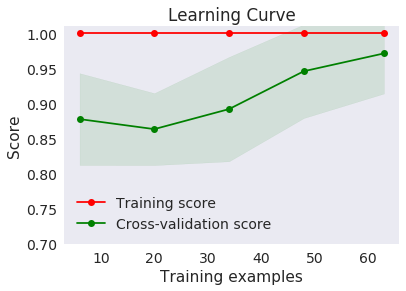

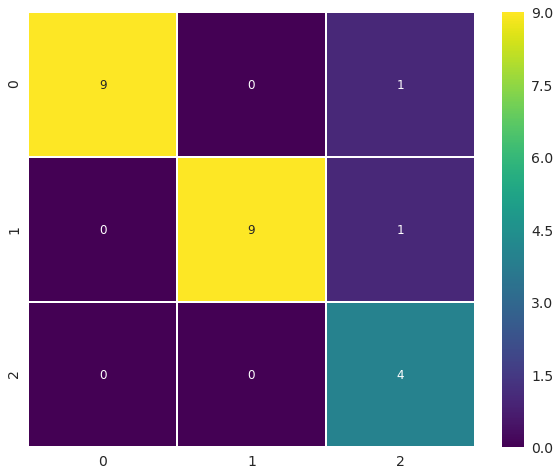

Training results using random_seed = 10
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      1.00      1.00        10
        3.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        24



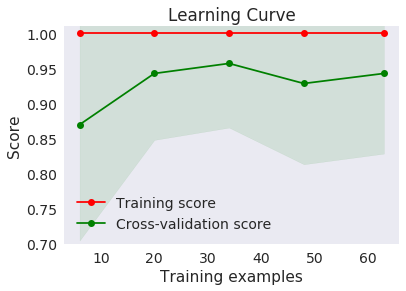

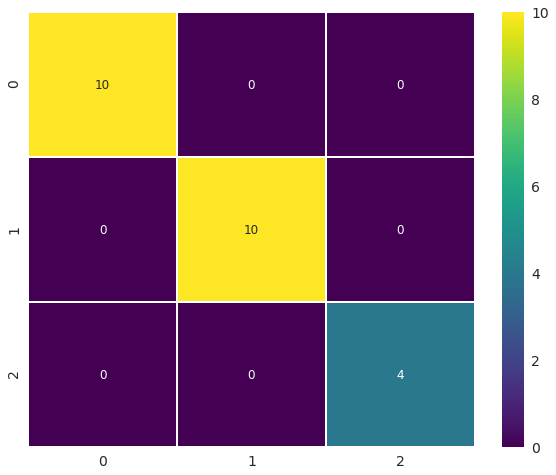

Training results using random_seed = 20
             precision    recall  f1-score   support

        1.0       1.00      0.90      0.95        10
        2.0       1.00      1.00      1.00        10
        3.0       0.80      1.00      0.89         4

avg / total       0.97      0.96      0.96        24



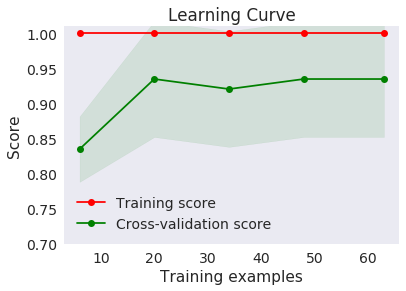

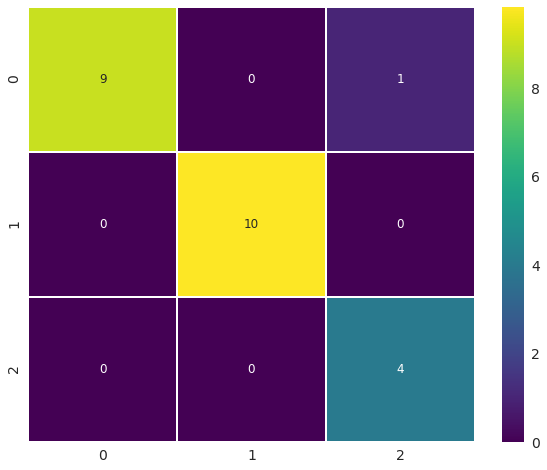

Training results using random_seed = 30
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      1.00      1.00        10
        3.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        24



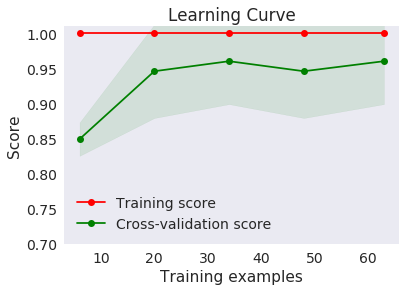

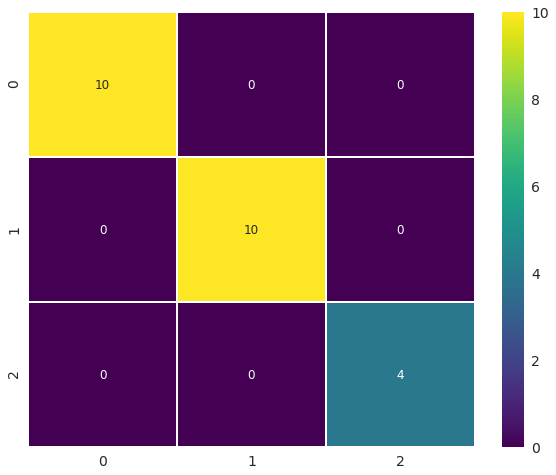

Training results using random_seed = 40
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      0.90      0.95        10
        3.0       0.80      1.00      0.89         4

avg / total       0.97      0.96      0.96        24



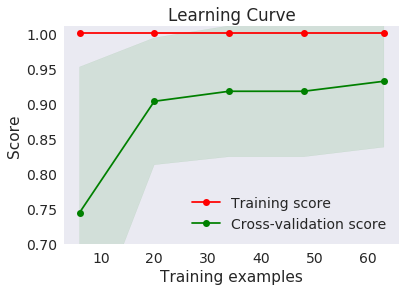

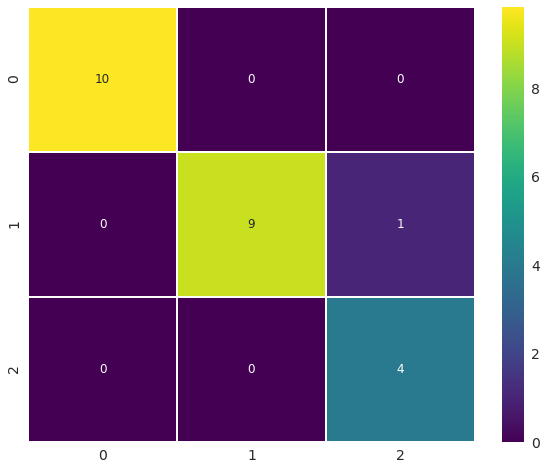

Training results using random_seed = 50
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      1.00      1.00        10
        3.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        24



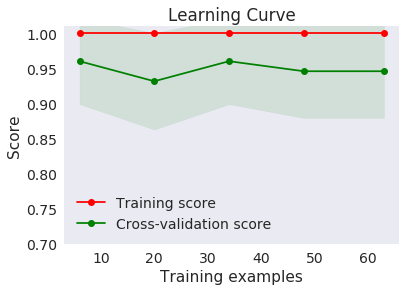

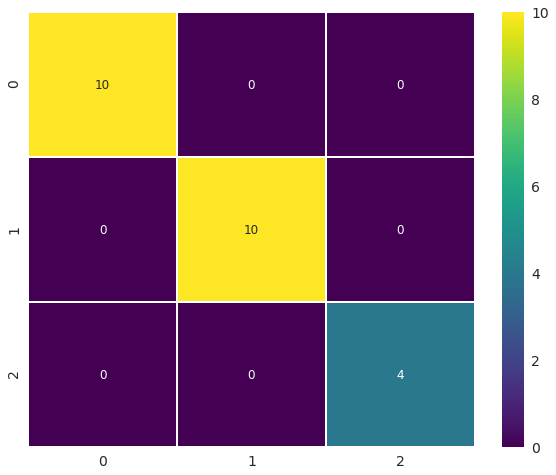

Training results using random_seed = 60
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      0.90      0.95        10
        3.0       0.80      1.00      0.89         4

avg / total       0.97      0.96      0.96        24



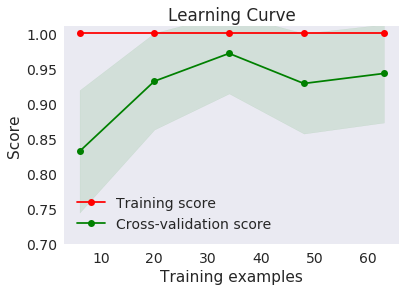

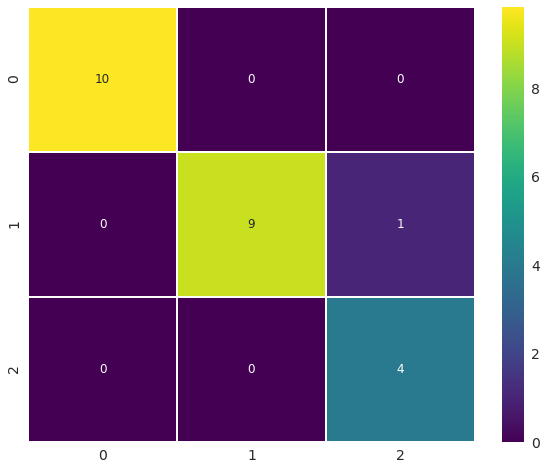

Training results using random_seed = 70
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      0.90      0.95        10
        3.0       0.80      1.00      0.89         4

avg / total       0.97      0.96      0.96        24



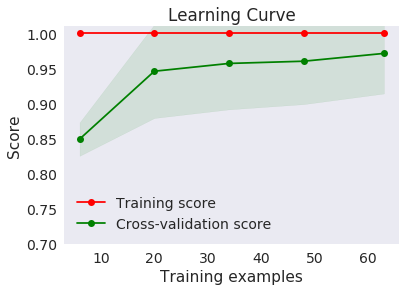

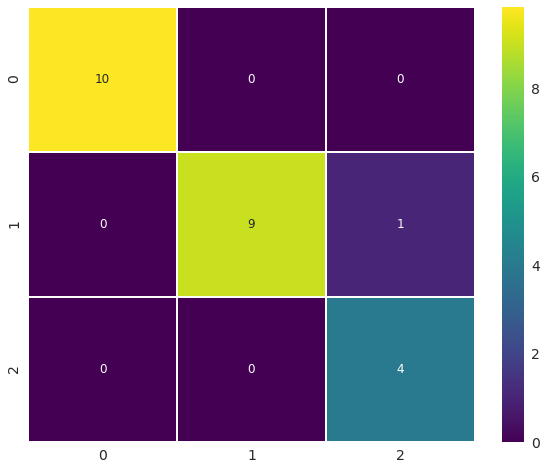

Training results using random_seed = 80
             precision    recall  f1-score   support

        1.0       1.00      0.90      0.95        10
        2.0       1.00      0.90      0.95        10
        3.0       0.67      1.00      0.80         4

avg / total       0.94      0.92      0.92        24



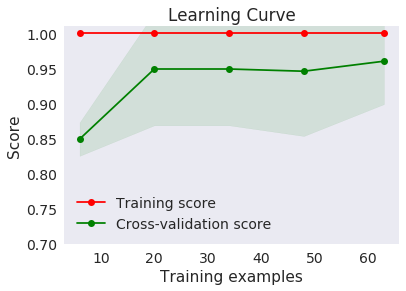

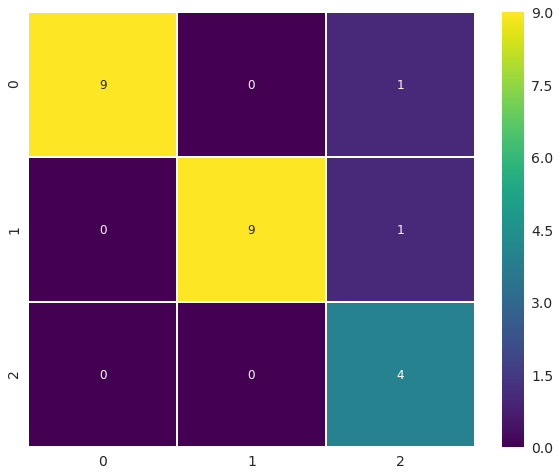

Training results using random_seed = 90
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      1.00      1.00        10
        3.0       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        24



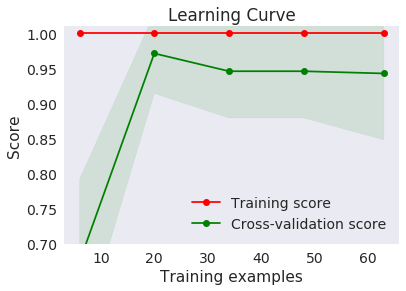

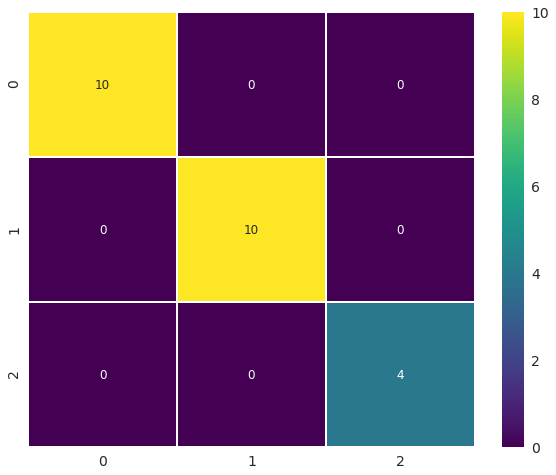

In [117]:
all_accuracy_results = []
all_predicted_labels = []
all_true_labels_tested = []

for i in range(0,100,10):
    for train_index, test_index in StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state = i).split(x,y):
        Xtrain = x[train_index,:]
        Xtest = x[test_index,:]
        Ytrain = y[train_index]
        Ytest = y[test_index]
    
    # Fit model and plot learning curve Train/Cross-validation
    plot_learning_curve(KNN_selected_model, "Learning Curve", Xtrain, Ytrain, ylim=(0.7, 1.01), cv=10, n_jobs=-1)
    #KNN_selected_model.fit(Xtrain, Ytrain)
    Ypred = KNN_selected_model.predict(Xtest)
    
    print("Training results using random_seed = " + str(i))
    print(classification_report(Ytest, Ypred))
    
    general_confusion_matrix = confusion_matrix(Ytest, Ypred)
    df_cm = pd.DataFrame(general_confusion_matrix, range(3), range(3))
    plt.figure(figsize = (10,8))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, robust=True, annot=True, linewidths=.5, cmap="viridis", annot_kws={"size": 12})
    plt.show()
    
    all_accuracy_results.append(accuracy_score(Ytest, Ypred, normalize=True))
    all_predicted_labels = all_predicted_labels + list(Ypred)
    all_true_labels_tested = all_true_labels_tested + list(Ytest)

[ 0.98542762  0.01334556]


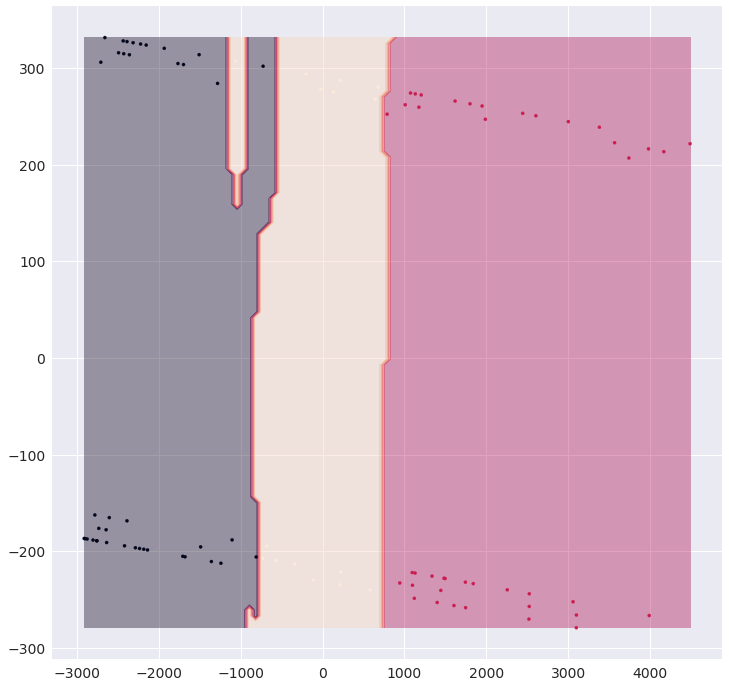

In [118]:
%matplotlib inline

from sklearn.decomposition import PCA
def plot_decision_areas_2D(X,Y,clf):
    pca = PCA(n_components = 2)  # 2 DIM
    Xpca = pca.fit_transform(X)  # X with dimensionality reduction

    clf.fit(Xpca,Y)

    x1, x2 = np.meshgrid(np.linspace(Xpca[:,0].min(),Xpca[:,0].max(),100),
                             np.linspace(Xpca[:,1].min(),Xpca[:,1].max(),100))

    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z = z.reshape(x1.shape)
    
    plt.figure(figsize=(12,12))
    plt.contourf(x1,x2,z,alpha=0.4)
    plt.scatter(Xpca[:,0],Xpca[:,1],s=10,c=Y)

    # See the effect of dimension reduction in variance
    print(pca.explained_variance_ratio_)

plot_decision_areas_2D(x, y, KNN_selected_model)

<IPython.core.display.Javascript object>


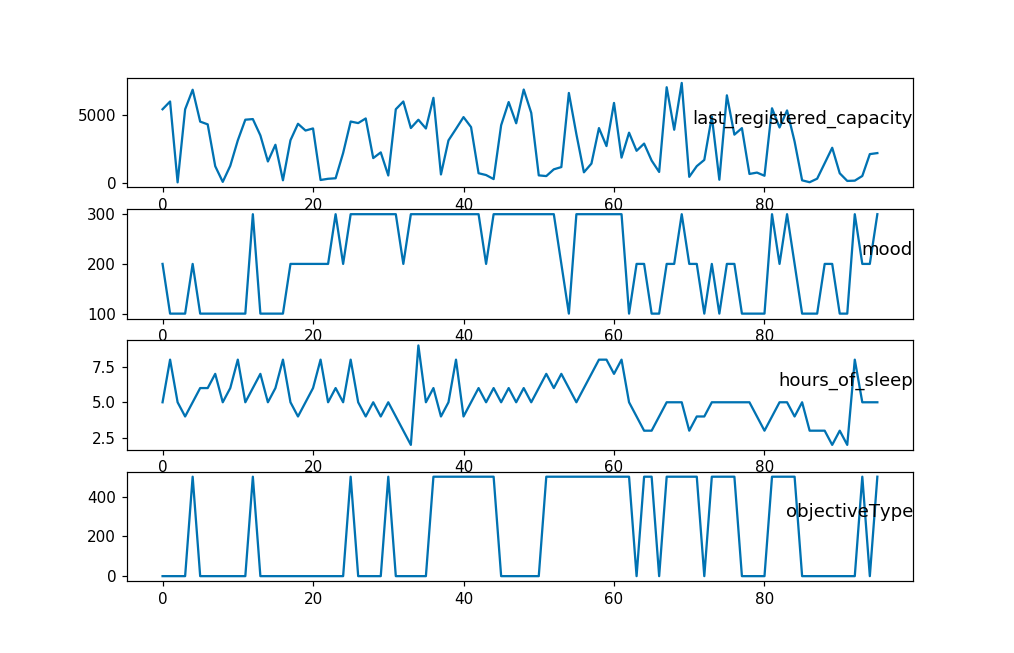

In [6]:
%matplotlib notebook
from matplotlib import pyplot
groups = [1, 2, 3, 4]
i = 1
pyplot.figure()
values = df.values
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [262]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [263]:
import sklearn
# integer encode direction
encoder = sklearn.preprocessing.LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.735298        0.5   0.428571        0.0        1.0   
2   0.010526   0.813303        0.0   0.857143        0.0        1.0   
3   0.021053   0.000000        0.0   0.428571        0.0        1.0   
4   0.031579   0.734892        0.0   0.285714        0.0        1.0   
5   0.042105   0.931459        0.5   0.428571        1.0        1.0   

   var7(t-1)   var1(t)   var2(t)  var3(t)   var4(t)  var5(t)  var6(t)  var7(t)  
1        0.5  0.010526  0.813303      0.0  0.857143      0.0      1.0      0.5  
2        0.5  0.021053  0.000000      0.0  0.428571      0.0      1.0      0.0  
3        0.0  0.031579  0.734892      0.0  0.285714      0.0      1.0      0.5  
4        0.5  0.042105  0.931459      0.5  0.428571      1.0      1.0      0.5  
5        0.5  0.052632  0.611059      0.0  0.571429      0.0      1.0      0.5  


In [264]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(95, 1, 13) (95,) (0, 1, 13) (0,)


In [265]:
CHECKPOINT_PATH = "checkpoint.{epoch:02d}-{val_loss:.2f}.hdf5"
MODEL = "model.hdf5"


checkpoint = ModelCheckpoint(filepath=CHECKPOINT_PATH,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')


early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.01,
                               patience=5,
                               verbose=1)

callbacks = [checkpoint, early_stopping]

In [266]:
def precision(y_true, y_pred):
    y_p = K.round(y_pred)
    tp = 1.0 * K.sum(y_true * y_p)
    return tp / K.sum(y_p)

def recall(y_true, y_pred):
    y_p = K.round(y_pred)
    tp = 1.0 * K.sum(y_true * y_p)
    return tp / K.sum(y_true)

def f1(y_true, y_pred):
    pre = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return (2 * pre * rec) / (pre + rec)

In [ ]:
model = Sequential()
model.add(Dropout(0.2))
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy', precision, recall, f1])
history = model.fit(train_X, train_y, epochs=50, batch_size=72, 
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)

In [ ]:
model = Sequential()
model2.add(Bidirectional(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True,
                        dropout=0.1, recurrent_dropout=0.1)))
model2.add(GlobalMaxPool1D())
model2.add(Dense(50, activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation="sigmoid"))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy', precision, recall, f1])
history = model.fit(X_train, y_train, batch_size=100, 
                      validation_data=(X_valid, y_valid), epochs=5, callbacks=callbacks_list)

Train on 95 samples, validate on 0 samples
Epoch 1/50
 - 6s - loss: 0.4210
Epoch 2/50
 - 0s - loss: 0.3985
Epoch 3/50
 - 0s - loss: 0.3771
Epoch 4/50
 - 0s - loss: 0.3613
Epoch 5/50
 - 0s - loss: 0.3531
Epoch 6/50
 - 0s - loss: 0.3464
Epoch 7/50
 - 0s - loss: 0.3400
Epoch 8/50
 - 0s - loss: 0.3339
Epoch 9/50
 - 0s - loss: 0.3280
Epoch 10/50
 - 0s - loss: 0.3221
Epoch 11/50
 - 0s - loss: 0.3164
Epoch 12/50
 - 0s - loss: 0.3106
Epoch 13/50
 - 0s - loss: 0.3048
Epoch 14/50
 - 0s - loss: 0.2990
Epoch 15/50
 - 0s - loss: 0.2931
Epoch 16/50
 - 0s - loss: 0.2870
Epoch 17/50
 - 0s - loss: 0.2809
Epoch 18/50
 - 0s - loss: 0.2746
Epoch 19/50
 - 0s - loss: 0.2684
Epoch 20/50
 - 0s - loss: 0.2631
Epoch 21/50
 - 0s - loss: 0.2590
Epoch 22/50
 - 0s - loss: 0.2560
Epoch 23/50
 - 0s - loss: 0.2538
Epoch 24/50
 - 0s - loss: 0.2538
Epoch 25/50
 - 0s - loss: 0.2540
Epoch 26/50
 - 0s - loss: 0.2533
Epoch 27/50
 - 0s - loss: 0.2519
Epoch 28/50
 - 0s - loss: 0.2501
Epoch 29/50
 - 0s - loss: 0.2478
Epoch 30/

KeyError: 'val_loss'

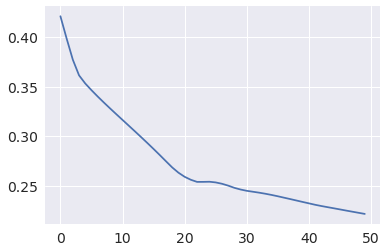

In [216]:
model = Sequential()
model2.add(Bidirectional(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True,
                        dropout=0.1, recurrent_dropout=0.1)))
model2.add(GlobalMaxPool1D())
model2.add(Dense(50, activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation="sigmoid"))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy', precision, recall, f1])
history2 = model2.fit(X_train, y_train, batch_size=100, 
                      validation_data=(X_valid, y_valid), epochs=5, callbacks=callbacks_list)

#generate plots
plt.figure()
plt.plot(hist2.history['loss'], lw=2.0, color='b', label='train')
plt.title('Long-Body Fake News Classification')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [222]:
# Declare connection with Firebase real-time database
from firebase import firebase
firebase = firebase.FirebaseApplication('https://trainer-hack.firebaseio.com', None)

In [233]:
# Post new json object
result = firebase.post('/predictions/', {"session_type": "2"})
print(result)

{u'name': u'-LDVzt4t1_yY-579LcEM'}


In [ ]:
# Retrieve data
result = firebase.get('/', 'sessions')
print(result)